In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [6]:
df_pre=pd.read_csv('exams (1).csv')
df_pre

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [7]:
df_pre.shape

(1000, 8)

In [8]:
df_pre[['math score', 'reading score', 'writing score']].agg(['var', 'std'])

,math score,reading score,writing score
var,232.568468,199.019095,225.778178
std,15.250196,14.107413,15.025917


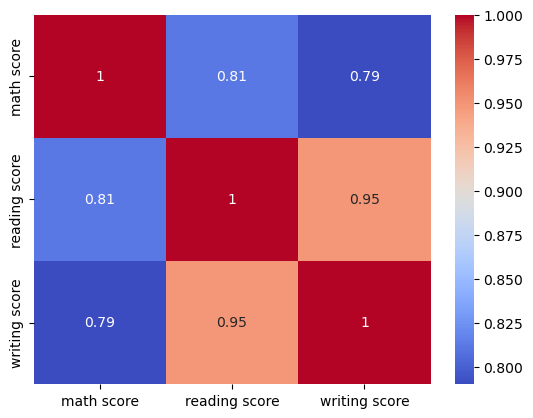

In [9]:
# Calculate the correlation matrix
correlation_matrix = df_pre.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [10]:
# Calculate the variance and standard deviation of scores based on whether the students completed the test prepration course
df_pre.groupby('test preparation course')[['math score', 'reading score', 'writing score']].agg(['var', 'std'])

math score            reading score             \
                                var        std           var        std   
test preparation course                                                   
completed                215.902493  14.693621    170.735609  13.066584   
none                     236.549430  15.380164    199.021300  14.107491   

                        writing score             
                                  var        std  
test preparation course                           
completed                  180.353753  13.429585  
none                       214.312260  14.639408

In [11]:
# Let's check the performance of students based on gender
df_pre.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,64.77439,73.473577,73.439024
male,70.75000,67.387795,64.976378


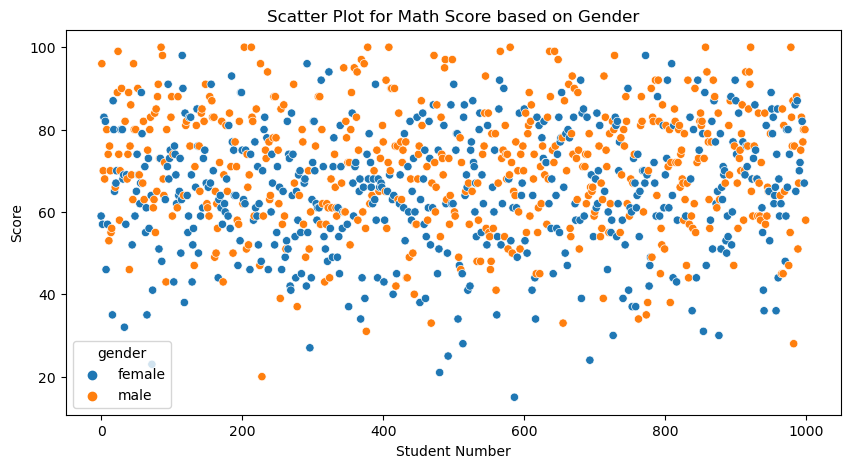

In [12]:
# Create scatter plot of math score based on gender
plt.figure(figsize=(10,5))
sns.scatterplot(x=range(0, len(df_pre)), y="math score", hue="gender", data=df_pre)

# Add labels and title
plt.title('Scatter Plot for Math Score based on Gender')
plt.xlabel('Student Number')
plt.ylabel('Score')

# Show the plot
plt.show()

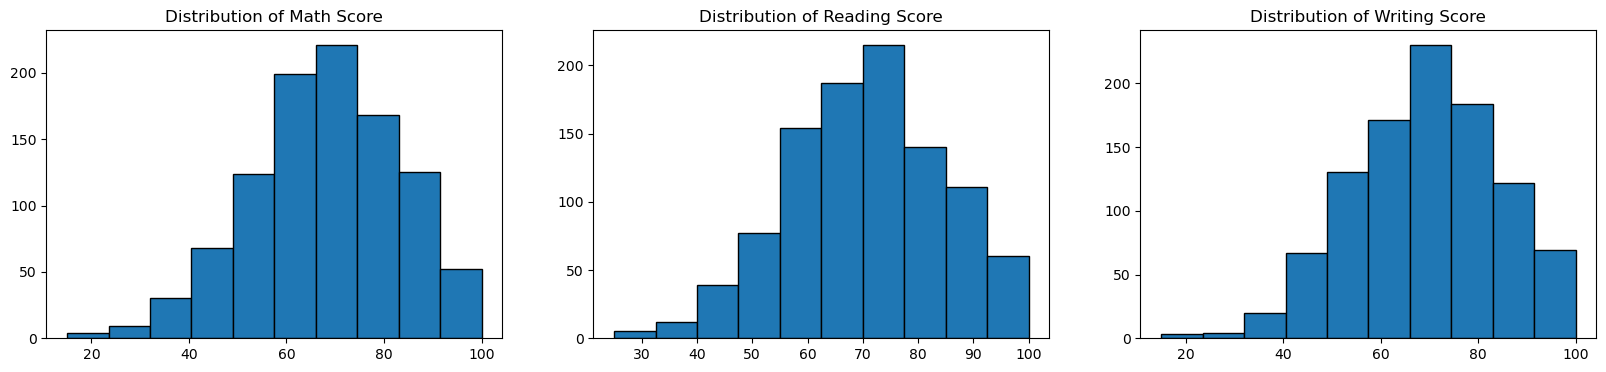

In [13]:
# Create subplots to show the distribution of each score
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))

# Plot for math
ax1.set_title('Distribution of Math Score')
ax1.hist(df_pre['math score'], edgecolor='black')

# Plot for reading
ax2.set_title('Distribution of Reading Score')
ax2.hist(df_pre['reading score'], edgecolor='black')

# Plot for writing
ax3.hist(df_pre['writing score'], edgecolor='black')
ax3.set_title('Distribution of Writing Score')

# Show plots
plt.show()

In [14]:
# One-hot encoding the categorical variables
df = pd.get_dummies(df_pre)
df

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,59,70,78,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
1,96,93,87,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
2,57,76,77,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
3,70,70,63,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
4,83,85,86,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,77,77,71,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
996,80,66,66,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
997,67,86,86,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
998,80,72,62,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1


In [15]:
# Get a summary of the dataframe
df.describe()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000,0.492000,0.508000,0.079000,0.198000,0.323000,0.257000,0.143000,0.204000,0.105000,0.215000,0.075000,0.224000,0.17700,0.340000,0.660000,0.344000,0.656000
std,15.250196,14.107413,15.025917,0.500186,0.500186,0.269874,0.398692,0.467857,0.437198,0.350248,0.403171,0.306707,0.411028,0.263523,0.417131,0.38186,0.473946,0.473946,0.475279,0.475279
min,15.000000,25.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,61.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,68.000000,70.500000,70.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000
75%,79.250000,80.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Check if there are any missing values
df.isna().any()

math score                                        False
reading score                                     False
writing score                                     False
gender_female                                     False
gender_male                                       False
race/ethnicity_group A                            False
race/ethnicity_group B                            False
race/ethnicity_group C                            False
race/ethnicity_group D                            False
race/ethnicity_group E                            False
parental level of education_associate's degree    False
parental level of education_bachelor's degree     False
parental level of education_high school           False
parental level of education_master's degree       False
parental level of education_some college          False
parental level of education_some high school      False
lunch_free/reduced                                False
lunch_standard                                  

In [17]:
# Assign variables
X = df.drop('math score', axis=1)
y = df['math score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [18]:
# Create a linear regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Evaluation Metrics')
print("Mean squared error:", mse)
print("Root Mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared score:", r2)

Evaluation Metrics
Mean squared error: 28.38885289905444
Root Mean squared error: 5.328119077034075
Mean absolute error: 4.379877672766591
R-squared score: 0.8702740399180283
